# Exploratory Data Analysis for Dataset 1: Heart Disease Dataset

## Importing Libraries

In [28]:
import sklearn
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb
from itertools import product
import scipy.stats as stats

## Retrieving and Cleaning (Lab 1)
- Getting CSV file
- Retrieving basic information on the dataset
- Removing duplicates and instances with null values

In [29]:
df=pd.read_csv('../../data/dataset/original_datasets/heart_2020_cleaned.csv')

In [30]:
#First 10 rows of the dataframe
df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [32]:
isNull = df.isna().sum()
duplicates_no = df.duplicated().sum()
print('Null values:\n',isNull)
print('\n\nDuplicates: ', duplicates_no)
df_shape = df.shape

Null values:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Duplicates:  18078


In [33]:
df.drop_duplicates(inplace=True)
print('Dataframe shape before:', df_shape)
print('\nDataframe shape after:', df.shape)

Dataframe shape before: (319795, 18)

Dataframe shape after: (301717, 18)


In [34]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Heart Disease Count: 
 HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64 



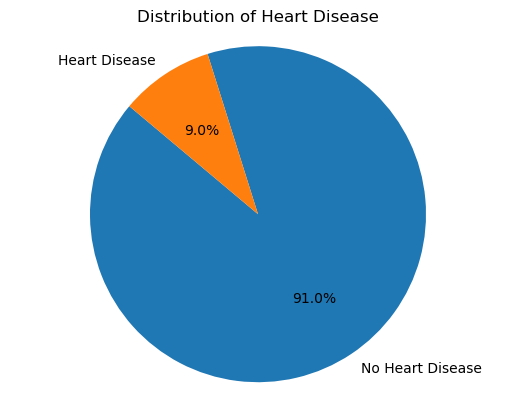

In [35]:

counts = df['HeartDisease'].value_counts()
print ('Heart Disease Count: \n' , counts, '\n')
plt.pie(counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Heart Disease')
plt.show()


In [36]:
df['Diabetic'].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

Making the diabetic feature binary due to the borderline and during pregnancy categories making up only 3%

In [37]:
df['Diabetic'] = df['Diabetic'].replace({
    'No, borderline diabetes': 'No',
    'Yes (during pregnancy)': 'Yes'
})

## General Statistics and VIsualization

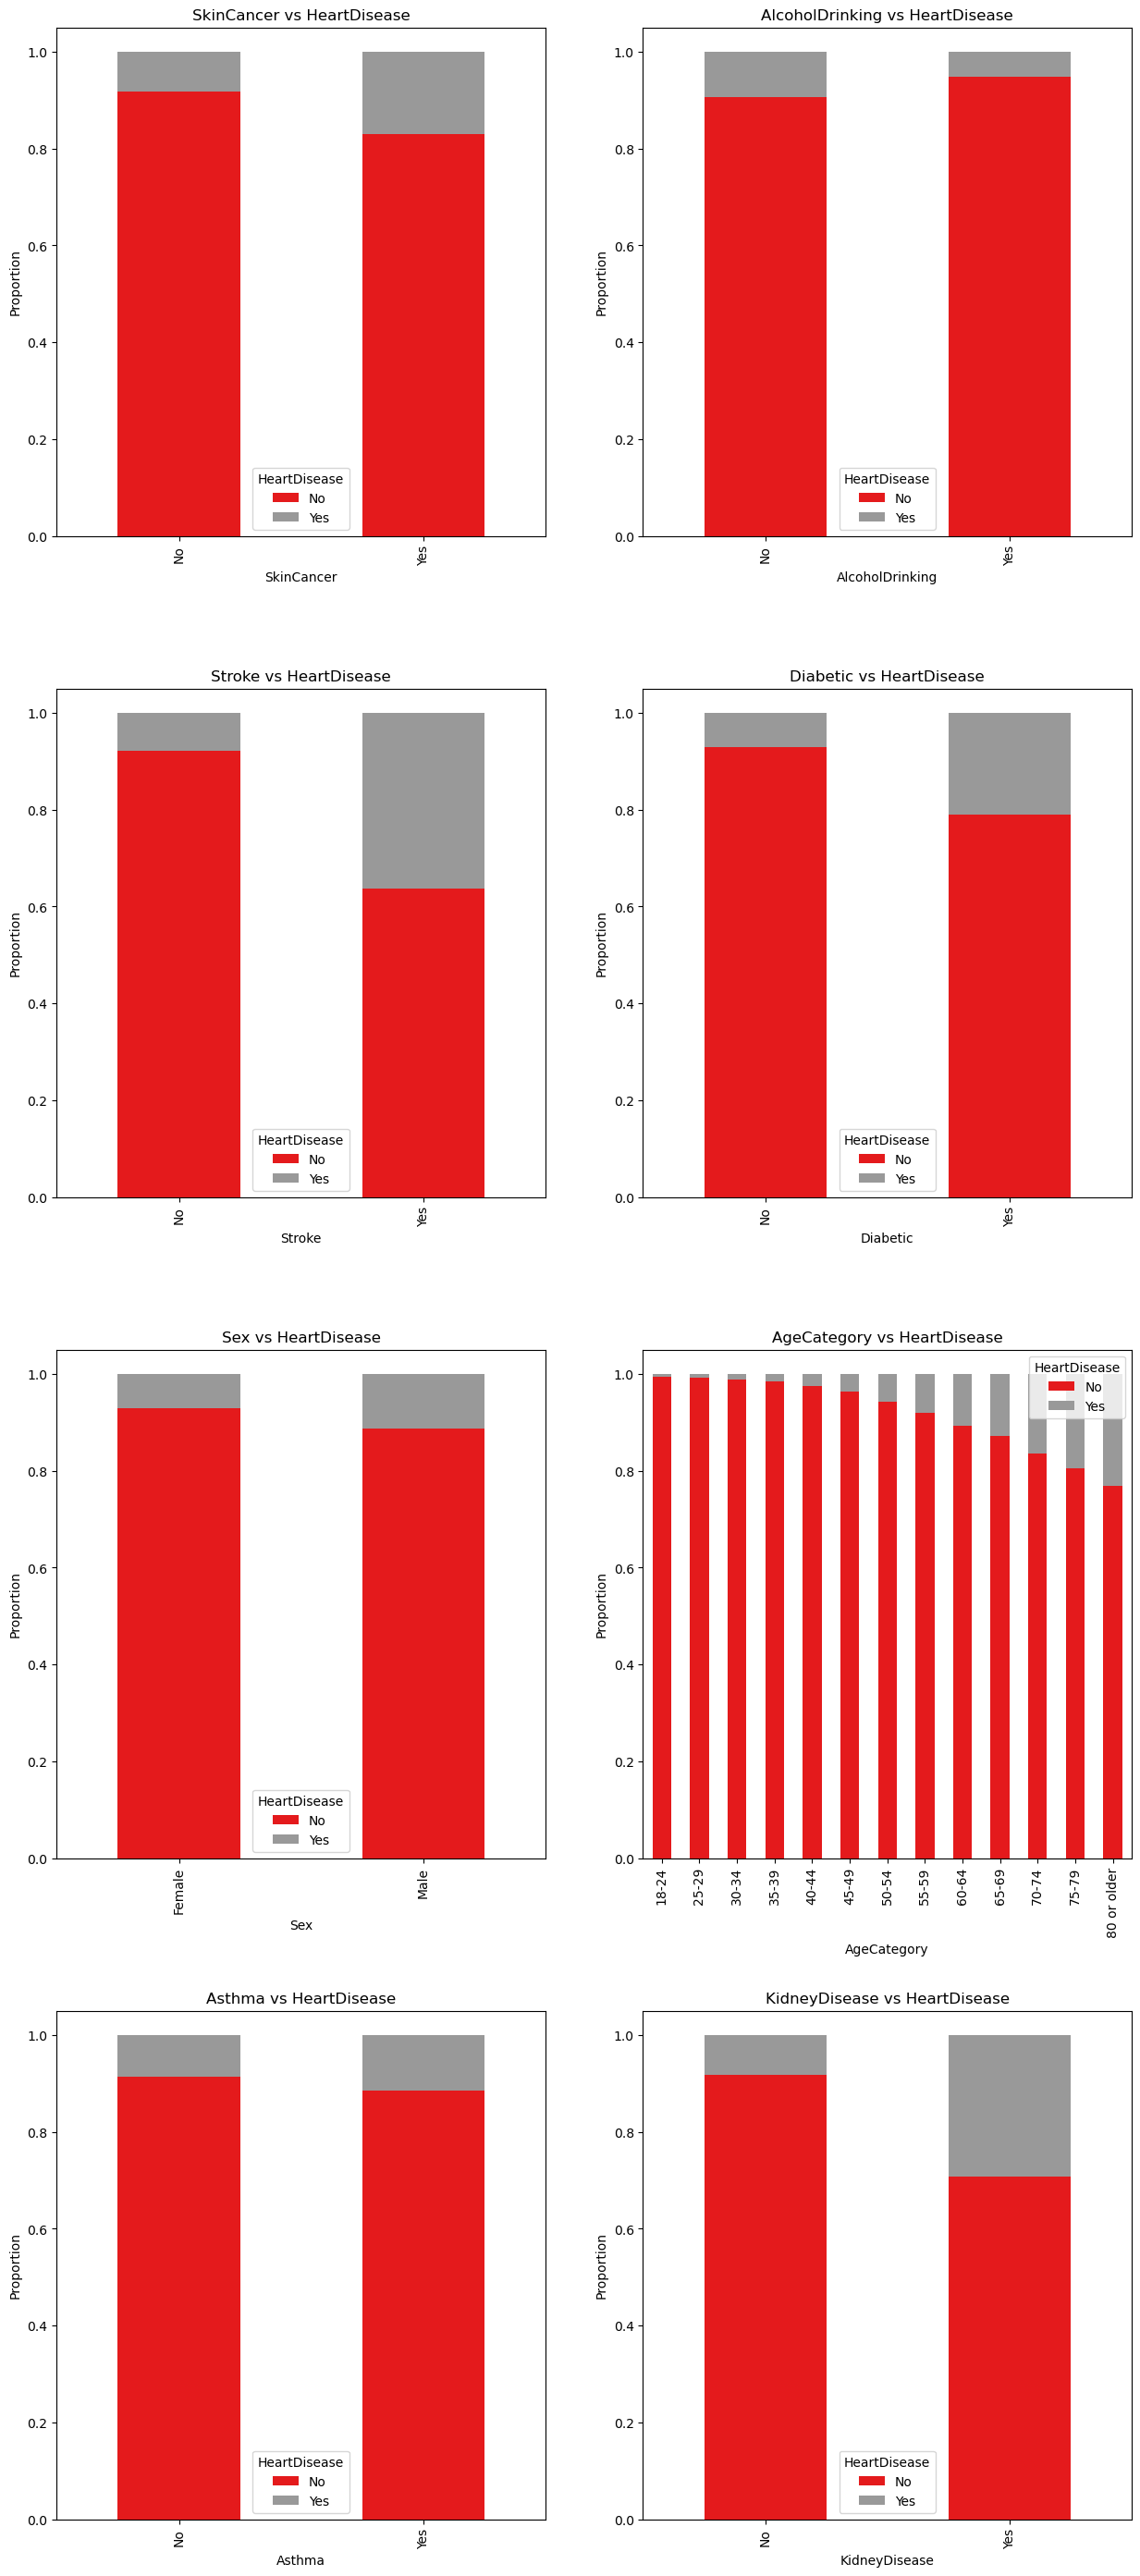

In [38]:
def stacked_bar(data, feature, target, ax, color_palette='tab20'):
  crosstab = pd.crosstab(data[feature], data[target], normalize='index')
  crosstab.plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)
  ax.set_title(f'{feature} vs {target}')
  ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(4, 2, figsize=(15, 35))

# Color palette selection (optional)
color_palette = 'Set1' 

# Plot each feature
stacked_bar(df, 'SkinCancer', 'HeartDisease', axes[0, 0], color_palette=color_palette)
stacked_bar(df, 'AlcoholDrinking', 'HeartDisease', axes[0, 1], color_palette=color_palette)
stacked_bar(df, 'Stroke', 'HeartDisease', axes[1, 0], color_palette=color_palette)
stacked_bar(df, 'Diabetic', 'HeartDisease', axes[1, 1], color_palette=color_palette)
stacked_bar(df, 'Sex', 'HeartDisease', axes[2, 0], color_palette=color_palette)
stacked_bar(df, 'AgeCategory', 'HeartDisease', axes[2, 1], color_palette=color_palette)
stacked_bar(df, 'Asthma', 'HeartDisease', axes[3, 0], color_palette=color_palette)
stacked_bar(df, 'KidneyDisease', 'HeartDisease', axes[3, 1], color_palette=color_palette)
# Adjust layout
plt.subplots_adjust(hspace=0.3)
plt.show()

In [39]:
X = df.drop("HeartDisease", axis=1)  # Features
y = df["HeartDisease"]  # Target

In [40]:
rus = RandomUnderSampler(random_state=45)  # Set random seed for reproducibility
X_resampled, y_resampled = rus.fit_resample(X, y)

In [41]:
print("Class distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after undersampling:
HeartDisease
No     27261
Yes    27261
Name: count, dtype: int64


In [42]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['HeartDisease'] = y_resampled

In [43]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54522 entries, 297669 to 319790
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               54522 non-null  float64
 1   Smoking           54522 non-null  object 
 2   AlcoholDrinking   54522 non-null  object 
 3   Stroke            54522 non-null  object 
 4   PhysicalHealth    54522 non-null  float64
 5   MentalHealth      54522 non-null  float64
 6   DiffWalking       54522 non-null  object 
 7   Sex               54522 non-null  object 
 8   AgeCategory       54522 non-null  object 
 9   Race              54522 non-null  object 
 10  Diabetic          54522 non-null  object 
 11  PhysicalActivity  54522 non-null  object 
 12  GenHealth         54522 non-null  object 
 13  SleepTime         54522 non-null  float64
 14  Asthma            54522 non-null  object 
 15  KidneyDisease     54522 non-null  object 
 16  SkinCancer        54522 non-null  objec

## Feature Selection (Lab 2)
The dataset has 18 features and we need to go through the process of selecting features with strong correlation

Creating a copy of the dataframe to perform label encoding in order to get a correlation matrix

In [44]:
#copy dataframe
df_numerical=df.copy()

In [45]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder as LE
encoder=LE()

In [46]:
for col in df_numerical.columns:
    if df_numerical[col].dtype == 'object':
        df_numerical[col] = encoder.fit_transform(df_numerical[col])

        # Print the mapping between original categories and assigned numerical values
        print(f"Column: {col}")
        print(f"Mapping: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}\n")

Column: HeartDisease
Mapping: {'No': 0, 'Yes': 1}

Column: Smoking
Mapping: {'No': 0, 'Yes': 1}

Column: AlcoholDrinking
Mapping: {'No': 0, 'Yes': 1}

Column: Stroke
Mapping: {'No': 0, 'Yes': 1}

Column: DiffWalking
Mapping: {'No': 0, 'Yes': 1}

Column: Sex
Mapping: {'Female': 0, 'Male': 1}

Column: AgeCategory
Mapping: {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}

Column: Race
Mapping: {'American Indian/Alaskan Native': 0, 'Asian': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'White': 5}

Column: Diabetic
Mapping: {'No': 0, 'Yes': 1}

Column: PhysicalActivity
Mapping: {'No': 0, 'Yes': 1}

Column: GenHealth
Mapping: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}

Column: Asthma
Mapping: {'No': 0, 'Yes': 1}

Column: KidneyDisease
Mapping: {'No': 0, 'Yes': 1}

Column: SkinCancer
Mapping: {'No': 0, 'Yes': 1}



In [47]:
df_numerical.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


Creating correlation matices for all target classes, heart disease class and no heart disease class

In [48]:
df_no_heart_disease = df_numerical[df_numerical['HeartDisease'] == 0]
df_yes_heart_disease = df_numerical[df_numerical['HeartDisease'] == 1]
# Calculate correlation matrices for each group
corr_matrix_no_disease = df_no_heart_disease.corr()
corr_matrix_yes_disease = df_yes_heart_disease.corr()
corr_matrix_df_num = df_numerical.corr()
'''
plt.figure(figsize=(18, 10), dpi=300)
sb.heatmap(corr_matrix_df_num ,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(18, 10), dpi=300)
sb.heatmap(corr_matrix_no_disease, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - No Heart Disease')
plt.show()

plt.figure(figsize=(18, 10), dpi=300)
sb.heatmap(corr_matrix_yes_disease, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Yes Heart Disease')
plt.show()

'''



"\nplt.figure(figsize=(18, 10), dpi=300)\nsb.heatmap(corr_matrix_df_num ,annot=True, cmap='coolwarm')\nplt.title('Correlation Matrix')\nplt.show()\n\nplt.figure(figsize=(18, 10), dpi=300)\nsb.heatmap(corr_matrix_no_disease, annot=True, cmap='coolwarm')\nplt.title('Correlation Matrix - No Heart Disease')\nplt.show()\n\nplt.figure(figsize=(18, 10), dpi=300)\nsb.heatmap(corr_matrix_yes_disease, annot=True, cmap='coolwarm')\nplt.title('Correlation Matrix - Yes Heart Disease')\nplt.show()\n\n"

### Using Chi Square Test and Cramer's V to get correlation between categorical features

In [49]:
df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()

In [50]:
categ = list(df_cat['index'].loc[df_cat['a'] == 'object'])
df_cat = df[categ]
df_cat.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [51]:
cat_1 = categ
cat_2 = categ
cat_prod = list(product(cat_1, cat_2, repeat = 1))
df_cat_v1 = df_cat.copy()
result = []
for i in cat_prod:
    if i[0] != i[1]:
        table = pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]])
        res_test = list(stats.chi2_contingency(table))
        result.append((i[0],i[1],res_test[0],res_test[1],res_test[2]))

In [52]:
result

[('HeartDisease', 'Smoking', 3295.579215756226, 0.0, 1),
 ('HeartDisease',
  'AlcoholDrinking',
  396.82851615896953,
  2.699812521029966e-88,
  1),
 ('HeartDisease', 'Stroke', 11429.939506432018, 0.0, 1),
 ('HeartDisease', 'DiffWalking', 11638.546629757671, 0.0, 1),
 ('HeartDisease', 'Sex', 1671.1471349933092, 0.0, 1),
 ('HeartDisease', 'AgeCategory', 18912.371040170525, 0.0, 12),
 ('HeartDisease', 'Race', 1030.058380646788, 1.866553483860569e-220, 5),
 ('HeartDisease', 'Diabetic', 8751.953811384972, 0.0, 1),
 ('HeartDisease', 'PhysicalActivity', 2642.383093573397, 0.0, 1),
 ('HeartDisease', 'GenHealth', 19421.55808209975, 0.0, 4),
 ('HeartDisease', 'Asthma', 385.98403265552605, 6.196831449538099e-86, 1),
 ('HeartDisease', 'KidneyDisease', 6138.935909214638, 0.0, 1),
 ('HeartDisease', 'SkinCancer', 2477.9668978495383, 0.0, 1),
 ('Smoking', 'HeartDisease', 3295.579215756226, 0.0, 1),
 ('Smoking', 'AlcoholDrinking', 3595.8765798990867, 0.0, 1),
 ('Smoking', 'Stroke', 1044.9660434939403,

In [56]:
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Calculate Cramer's V
    n = contingency_table.sum().sum()
    phi2 = chi2_statistic / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    k_corr = k - (k - 1) * (k - 2) / (n - 1)
    r_corr = r - (r - 1) * (r - 2) / (n - 1)
    v = np.sqrt(phi2corr / min(k_corr - 1, r_corr - 1))
    
    return v
# Iterate over all pairs of categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
           cramers_v_matrix.loc[col1, col2] = cramers_v(df_cat[col1], df_cat[col2])

In [58]:
cramers_v_matrix

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
HeartDisease,NaN,0.104496,0.03622,0.194627,0.196395,0.074401,0.250285,0.058287,0.170305,0.093566,0.253687,0.035721,0.14263,0.090607
Smoking,0.104496,NaN,0.109155,0.058822,0.115765,0.087488,0.165172,0.117021,0.049226,0.089838,0.164739,0.01744,0.031821,0.030372
AlcoholDrinking,0.03622,0.109155,NaN,0.022601,0.041076,0.006563,0.072174,0.046303,0.063442,0.024325,0.040364,0.006858,0.03108,0.008525
Stroke,0.194627,0.058822,0.022601,NaN,0.170631,0.0,0.146561,0.04105,0.100949,0.074856,0.181809,0.03487,0.089047,0.045975
DiffWalking,0.196395,0.115765,0.041076,0.170631,NaN,0.067301,0.257683,0.059123,0.203156,0.271731,0.451994,0.095795,0.149436,0.060552
Sex,0.074401,0.087488,0.006563,0.0,0.067301,NaN,0.067577,0.039697,0.0,0.045264,0.028622,0.067926,0.007339,0.01573
AgeCategory,0.250285,0.165172,0.072174,0.146561,0.257683,0.067577,NaN,0.098695,0.210151,0.131962,0.098403,0.062092,0.130115,0.283934
Race,0.058287,0.117021,0.046303,0.04105,0.059123,0.039697,0.098695,NaN,0.05735,0.068522,0.055256,0.03699,0.025157,0.1557
Diabetic,0.170305,0.049226,0.063442,0.100949,0.203156,0.0,0.210151,0.05735,NaN,0.12851,0.267634,0.039457,0.14604,0.029773
PhysicalActivity,0.093566,0.089838,0.024325,0.074856,0.271731,0.045264,0.131962,0.068522,0.12851,NaN,0.282609,0.032077,0.077262,0.004411


### Using Chi Square Test and Cramer's V to get correlation between categorical features for Under Sampled data

In [ ]:
df_cat_resample = pd.DataFrame(data = resampled_df.dtypes, columns = ['a']).reset_index()

In [ ]:
categ_re = list(df_cat_resample['index'].loc[df_cat_resample['a'] == 'object'])
df_cat_resample = resampled_df[categ]
df_cat_resample.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
297669,No,No,No,No,No,Male,40-44,White,Yes,Yes,Good,No,No,No
29855,No,Yes,Yes,No,No,Female,35-39,White,No,Yes,Good,No,No,No
211002,No,No,No,No,No,Female,35-39,White,No,Yes,Fair,No,No,No
138630,No,Yes,Yes,No,No,Female,60-64,White,No,Yes,Excellent,No,No,No
236648,No,No,No,No,No,Female,18-24,Hispanic,No,Yes,Good,No,No,No


In [ ]:
cat_1_re = categ_re
cat_2_re = categ_re
cat_prod_re = list(product(cat_1_re, cat_2_re, repeat = 1))
df_cat_v1_re = df_cat_resample.copy()
re_result = []
for i in cat_prod_re:
    if i[0] != i[1]:
        table = pd.crosstab(df_cat_v1[i[0]], df_cat_v1[i[1]])
        res_test = list(stats.chi2_contingency(table))
        result.append((i[0],i[1],res_test[0],res_test[1],res_test[2]))

In [ ]:
re_result

[]

In [ ]:

# Iterate over all pairs of categorical variables
categorical_cols_re = resampled_df.select_dtypes(include='object').columns.tolist()

for col1 in categorical_cols_re:
    for col2 in categorical_cols_re:
        if col1 != col2:
            cramer_v_value = cramer_v(resampled_df, col1, col2)
            print(f"Cramer's V between {col1} and {col2}: {cramer_v_value:.4f}")

Cramer's V between Smoking and AlcoholDrinking: 0.0907
Cramer's V between Smoking and Stroke: 0.0749
Cramer's V between Smoking and DiffWalking: 0.1302
Cramer's V between Smoking and Sex: 0.1121
Cramer's V between Smoking and AgeCategory: 0.1716
Cramer's V between Smoking and Race: 0.1183
Cramer's V between Smoking and Diabetic: 0.0787
Cramer's V between Smoking and PhysicalActivity: 0.1017
Cramer's V between Smoking and GenHealth: 0.1942
Cramer's V between Smoking and Asthma: 0.0329
Cramer's V between Smoking and KidneyDisease: 0.0341
Cramer's V between Smoking and SkinCancer: 0.0279
Cramer's V between Smoking and HeartDisease: 0.1865
Cramer's V between AlcoholDrinking and Smoking: 0.0907
Cramer's V between AlcoholDrinking and Stroke: 0.0279
Cramer's V between AlcoholDrinking and DiffWalking: 0.0490
Cramer's V between AlcoholDrinking and Sex: 0.0062
Cramer's V between AlcoholDrinking and AgeCategory: 0.0976
Cramer's V between AlcoholDrinking and Race: 0.0364
Cramer's V between Alcohol